In [2]:
#_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Input PY modules and FACTS module names/data
#
WHOSRUN     = 'pkT3'
#
%run ./T3_IP_modules.ipynb 
#
# ........................................................................................
#
modNO       = np.arange(0,26)   # Number of modules/submodules
modNO       = [0]
YEAR        = 2100
#SCENARIO    = ['ssp126', 'ssp245', 'ssp585']
SCENARIO    = ['ssp585']
#
#_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Loop over scenario. 
for scenario in SCENARIO:
    # Define pd DF columns to append.
    PERCENTILE  = '%ile({arg1}-Run,{arg2})'.format(arg1=WHOSRUN,arg2=scenario)
    percentile = np.nan
    df[PERCENTILE] = percentile
    df[PERCENTILE] = df[PERCENTILE].astype('object')
    #
    # Loop over each dataset to find the percentiles.
    for val in modNO:
        #
        MODULE      = df.loc[val].at['Module']
        SUB_MODULE  = df.loc[val].at['sub_Module']
        #
        # Skip if data is absent.
        if df.loc[val].at['O/P_Data'] == 'XXX':
           continue 
        # 
        # Pick the data files. (Need to resolve the localhost naming)
        if WHOSRUN == 'pkT3':
            dataFOLDER = '../modules/{arg1}/{arg2}/test/output/'.format(arg1=MODULE,arg2=SUB_MODULE)
            dataFILE   = df.loc[val].at['O/P_Data']
        else:
            if scenario == 'ssp585':
                dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}.localhost/output/'.format(arg1=scenario)
                dataFILE   = 'coupling.{arg1}.localhost.'.format(arg1=scenario) + df.loc[val].at['O/P_Data']
            else:
                dataFOLDER = '/projects/kopp/facts-experiments/coupling.{arg1}/output/'.format(arg1=scenario)
                dataFILE   = 'coupling.{arg1}.'.format(arg1=scenario) + df.loc[val].at['O/P_Data']
        #   
        #print('Module =', MODULE, '|| SUB_MODULE =', SUB_MODULE,'\n')
        dataPATH   = dataFOLDER+dataFILE
        # ........................................................................................
        # Print to check the nc file details.
        print_nc = 1;    print_var = 1
        # 
        # IMPORT .nc data
        %run ./T3_IP_ncDATA.ipynb   #I/P data
        #
        #_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
        # Find the required year
        ind = np.where(yrs == YEAR)[0][0]
        #
        # ........................................................................................
        if SUB_MODULE == 'temperature':
            GMSL = sst[:,ind,:]
        else:
            GMSL = slc[:,ind,:]
        # ........................................................................................
        # Find median, 17th and 83rd Percentile.
        pcntle = np.percentile(GMSL[:,0], [50, 17, 83])
        pcntle = np.around(pcntle,2)
        #
        # Add to DF.
        df.at[val,PERCENTILE] = [pcntle[0], pcntle[1],pcntle[2]]
        #
#_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_
# Print the OP.
#print('GMSL Component Projections for ',yrs[ind])    
#show(df)
df

<IPython.core.display.Javascript object>

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source: FACTS
    Date Created: 2022-11-16 13:42:31.576242
    Description: Fair v=1.6.4 scenario simulations with AR6-calibrated settings. Simulations based on parameters developed here: https://github.com/chrisroadmap/ar6/tree/main/notebooks. Parameters obtained from: https://zenodo.org/record/5513022#.YVW1HZpByUk.
    Method: Temperature and ocean heat content were returned from fair.foward.fair_scm() in emission-driven mode.
    Scenario emissions file: rcmip/rcmip-emissions-annual-means-v5-1-0.csv
    FAIR Parameters file: parameters/fair_ar6_climate_params_v4.0.nc
    FaIR version: 1.6.4
    Scenario: ssp585
    Centered: 1850-1900 mean
    Smoothing window: 19 years
    Note: Code provided by Kelly McCusker of Rhodium Group Climate Impact Lab and adapted for use in FACTS.
    dimensions(sizes): samples(500), years(751), locations(1)
    variables(dimensions): float32 surface_temperature(sam

./T3_IP_ncDATA.ipynb:5: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  "execution_count": null,


,Num,di,Module,sub_Module,O/P_Data,"%ile(pkT3-Run,ssp585)"
0,0,GSAT,fair,temperature,fair-temperature-fair-ssp585_gsat.nc,"[4.65, 3.91, 5.61]"
1,1,TE,tlm,oceandynamics,oceandynamics-tlm-oceandynamics-ssp585_globals...,NaN
2,2,TE,ipccar5,thermalexpansion,thermalexpansion-ar5-thermalexpansion-ssp585_g...,NaN
3,3,Glaciers,kopp14,glaciers,glaciers-kopp14-glaciers-rcp85_globalsl.nc,NaN
4,4,Glaciers,ipccar5,glaciers,glaciers-ar5-glaciers-ssp585_globalsl.nc,NaN
5,5,Glaciers,ipccar5,glacierscmip6,glaciers-ar5-glacierscmip6-ssp585_globalsl.nc,NaN
6,6,Glaciers,ipccar5,glaciersfair,glaciers-ar5-glaciersfair-ssp585_globalsl.nc,NaN
7,7,Glaciers,ipccar6,gmipemuglaciers,glaciers-ipccar6-gmipemuglaciers-ssp585_global...,NaN
8,8,Glaciers,emulandice,glaciers,glaciers-emulandice-glaciers-ssp585_globalsl.nc,NaN
9,9,GrIS,ipccar5,icesheets,XXX,NaN


In [3]:
#print(dataFILE)
dumDAT
# dum =dumDAT.variables['samps'][:]
# dum.shape

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source: FACTS
    Date Created: 2022-11-16 13:42:31.576242
    Description: Fair v=1.6.4 scenario simulations with AR6-calibrated settings. Simulations based on parameters developed here: https://github.com/chrisroadmap/ar6/tree/main/notebooks. Parameters obtained from: https://zenodo.org/record/5513022#.YVW1HZpByUk.
    Method: Temperature and ocean heat content were returned from fair.foward.fair_scm() in emission-driven mode.
    Scenario emissions file: rcmip/rcmip-emissions-annual-means-v5-1-0.csv
    FAIR Parameters file: parameters/fair_ar6_climate_params_v4.0.nc
    FaIR version: 1.6.4
    Scenario: ssp585
    Centered: 1850-1900 mean
    Smoothing window: 19 years
    Note: Code provided by Kelly McCusker of Rhodium Group Climate Impact Lab and adapted for use in FACTS.
    dimensions(sizes): samples(500), years(751), locations(1)
    variables(dimensions): float32 surface_temperature(sam

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

%matplotlib inline

ds_disk = xr.open_dataset(dataPATH)

In [8]:
ds_disk

<xarray.Dataset>
Dimensions:              (samples: 500, years: 751, locations: 1)
Coordinates:
  * years                (years) int64 1750 1751 1752 1753 ... 2498 2499 2500
  * locations            (locations) int64 -1
  * samples              (samples) int64 0 1 2 3 4 5 ... 494 495 496 497 498 499
Data variables:
    surface_temperature  (samples, years, locations) float32 ...
    lat                  (locations) float64 ...
    lon                  (locations) float64 ...
Attributes:
    Source:                   FACTS
    Date Created:             2022-11-16 13:42:31.576242
    Description:              Fair v=1.6.4 scenario simulations with AR6-cali...
    Method:                   Temperature and ocean heat content were returne...
    Scenario emissions file:  rcmip/rcmip-emissions-annual-means-v5-1-0.csv
    FAIR Parameters file:     parameters/fair_ar6_climate_params_v4.0.nc
    FaIR version:             1.6.4
    Scenario:                 ssp585
    Centered:                 1850-1900 mean
    Smoothing window:         19 years
    Note:                     Code provided by Kelly McCusker of Rhodium Grou...

In [9]:
ds_disk['surface_temperature']

<xarray.DataArray 'surface_temperature' (samples: 500, years: 751, locations: 1)>
[375500 values with dtype=float32]
Coordinates:
  * years      (years) int64 1750 1751 1752 1753 1754 ... 2497 2498 2499 2500
  * locations  (locations) int64 -1
  * samples    (samples) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Attributes:
    units:    degC

In [10]:
ds_disk['surface_temperature'].plt()

AttributeError: 'DataArray' object has no attribute 'plt'

In [11]:
ds_disk.surface_temperature.dims

<xarray.DataArray 'surface_temperature' (samples: 500, years: 751, locations: 1)>
[375500 values with dtype=float32]
Coordinates:
  * years      (years) int64 1750 1751 1752 1753 1754 ... 2497 2498 2499 2500
  * locations  (locations) int64 -1
  * samples    (samples) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Attributes:
    units:    degC

In [12]:
ds_disk.surface_temperature.dims

('samples', 'years', 'locations')

In [13]:
ds_disk.surface_temperature.coords

Coordinates:
  * years      (years) int64 1750 1751 1752 1753 1754 ... 2497 2498 2499 2500
  * locations  (locations) int64 -1
  * samples    (samples) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499

In [18]:
ds_disk.coords["years"]

<xarray.DataArray 'years' (years: 751)>
array([1750, 1751, 1752, ..., 2498, 2499, 2500])
Coordinates:
  * years    (years) int64 1750 1751 1752 1753 1754 ... 2496 2497 2498 2499 2500

In [19]:
ds_disk.surface_temperature.attrs

{'units': 'degC'}

In [22]:
# Temperature as an array
gg =ds_disk.surface_temperature.data
gg

array([[[ 8.2317479e-03],
        [ 2.7953802e-02],
        [ 3.9118543e-02],
        ...,
        [ 8.6212072e+00],
        [ 8.6219149e+00],
        [ 8.6226206e+00]],

       [[-5.1200218e-02],
        [-3.8243234e-02],
        [-3.2322548e-02],
        ...,
        [ 5.7316523e+00],
        [ 5.7326617e+00],
        [ 5.7336664e+00]],

       [[-1.9748833e-02],
        [-7.4055459e-04],
        [ 4.7643469e-03],
        ...,
        [ 6.2390671e+00],
        [ 6.2404118e+00],
        [ 6.2417488e+00]],

       ...,

       [[ 2.7200345e-02],
        [ 4.4697270e-02],
        [ 5.4740053e-02],
        ...,
        [ 1.1463856e+01],
        [ 1.1468923e+01],
        [ 1.1473964e+01]],

       [[-1.5631191e-02],
        [ 5.2390317e-03],
        [ 1.5282496e-02],
        ...,
        [ 7.2351022e+00],
        [ 7.2367721e+00],
        [ 7.2384329e+00]],

       [[-5.2288841e-02],
        [-3.6866229e-02],
        [-2.8613530e-02],
        ...,
        [ 5.5648828e+00],
        [ 5.565

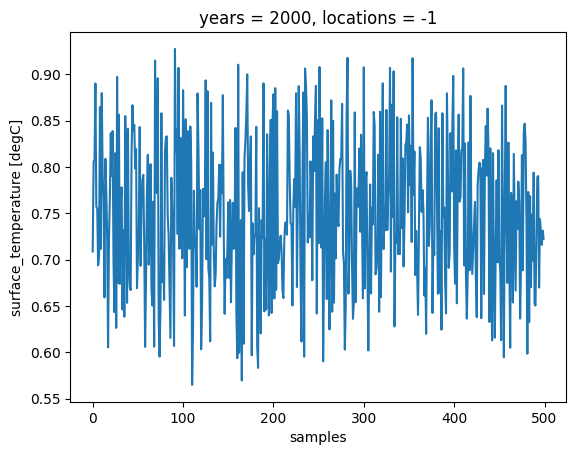

In [30]:
ds_disk.surface_temperature.sel(years=2000).plot(x="samples")

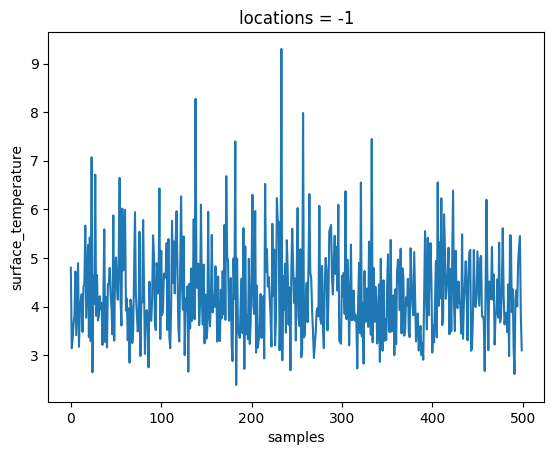

In [35]:
ds_disk.surface_temperature.mean("years").plot(x="samples")

In [36]:
# make dask cluster; this is for demo purposes
import dask
import distributed

cluster = distributed.LocalCluster()

In [37]:
client = distributed.Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 8
Total threads: 56,Total memory: 125.06 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43249,Workers: 8
Dashboard: http://127.0.0.1:8787/status,Total threads: 56
Started: Just now,Total memory: 125.06 GiB
Comm: tcp://127.0.0.1:43831,Total threads: 7
Dashboard: http://127.0.0.1:41550/status,Memory: 15.63 GiB
Nanny: tcp://127.0.0.1:46480,


In [62]:
# demonstrate dask dataset
# ds_disk = xr.open_dataset(dataPATH)
dasky = xr.open_dataset(dataPATH)[
# dasky = ds_disk.open_dataset(
    "surface_temperature",
    chunks={"years": 10},  # 10 time steps in each block
]

dasky.air

ds = xr.tutorial.load_dataset("air_temperature")

SyntaxError: invalid syntax (3475550131.py, line 6)

In [65]:
xr.tutorial.open_dataset

<function xarray.tutorial.open_dataset(name, cache=True, cache_dir=None, *, engine=None, **kws)>

In [67]:
# ds_disk = xr.open_dataset(dataPATH)
dasky = xr.open_dataset(
    dataPATH,
    chunks={"years": 10},  # 10 time steps in each block
)

dasky.surface_temperature

<xarray.DataArray 'surface_temperature' (samples: 500, years: 751, locations: 1)>
dask.array<open_dataset-2a0f1c888900d07672b1c73d1d088aaasurface_temperature, shape=(500, 751, 1), dtype=float32, chunksize=(500, 10, 1), chunktype=numpy.ndarray>
Coordinates:
  * years      (years) int64 1750 1751 1752 1753 1754 ... 2497 2498 2499 2500
  * locations  (locations) int64 -1
  * samples    (samples) int64 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
Attributes:
    units:    degC

In [ ]:
#res.xs([YaxD,YaxD1]).str[1].values
# res.xs('2100', axis=0)
# r_res = res.reset_index()
# print(reset_res)

# res.loc['wf1e','ssp126']
# gg = res.loc['wf1e','ssp126'][:1].str[0]
# gg[:1]
# r_res.iloc[0,10][1]

res.xs(['wf1e','ssp126'])


KeyError: ['wf1e', 'ssp126']